# **Portofolio 2**

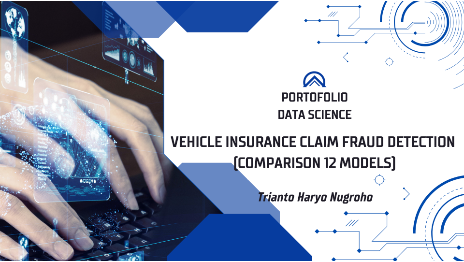

##**Vehicle Insurance Claim Fraud Detection (Comparison 12 Models)**## 

By : Trianto Haryo Nugroho

###**Data Understanding**###


####**Vehicle Insurance Fraud Detection**####
Vehicle insurance fraud involves conspiring to make false or exaggerated claims involving property damage or personal injuries following an accident. Some common examples include staged accidents where fraudsters deliberately “arrange” for accidents to occur; the use of phantom passengers where people who were not even at the scene of the accident claim to have suffered grievous injury, and make false personal injury claims where personal injuries are grossly exaggerated.


####**About this dataset**####
This dataset contains vehicle dataset - attribute, model, accident details, etc along with policy details - policy type, tenure etc. The target is to detect if a claim application is fraudulent or not - FraudFound_P


####**Source**####
https://www.kaggle.com/datasets/shivamb/vehicle-claim-fraud-detection

####**Dimension**####
The data contains 15.421 rows and 33 columns. 

###**Exploratory Data Analysis (EDA)**####

**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

**Upload Dataset**

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving fraud_oracle.csv to fraud_oracle (1).csv


**Read Dataset**

In [ ]:
df = pd.read_csv('fraud_oracle.csv')

**Display 5 Samples**

In [ ]:
df.head(5)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


**Dataset Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

The dataset consists of 15.421 rows and 33 columns columns

**Checking Missing Values**

In [ ]:
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

There is no missing value in the dataset


**Checking Data Duplicates**

In [ ]:
df[df.duplicated()]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy


There is no duplicate data in the dataset

**Checking Shape or Dimension**

In [ ]:
df.shape

(15420, 33)

**Checking Label Proportion**

In [ ]:
df.FraudFound_P.value_counts()

0    14497
1      923
Name: FraudFound_P, dtype: int64

In [ ]:
print(df.FraudFound_P.value_counts(normalize=True)*100)
print('\n')

0    94.014267
1     5.985733
Name: FraudFound_P, dtype: float64




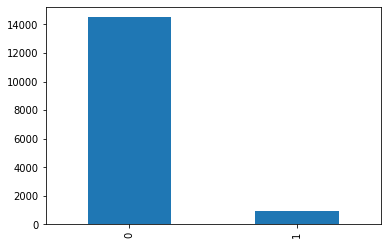

In [ ]:
df.FraudFound_P.value_counts().plot(kind='bar')

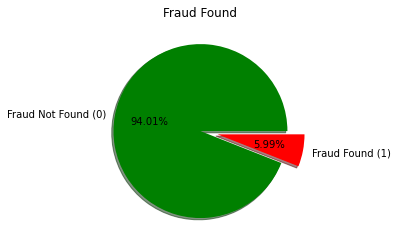

In [ ]:
import matplotlib.pyplot as plt

label = ('Fraud Not Found (0)', 'Fraud Found (1)')
color = ('green','red')
explode = (0, 0.2)

plt.title('Fraud Found')
plt.pie(
    df.FraudFound_P.value_counts(),
    labels=label,
    autopct='%1.2f%%',
    colors=color,
    explode=explode,
    shadow=True
)
plt.show()

Significant differences in the proportion of labels in the classification case can cause computers/machines to not learn well so that the model formed can only recognize dominant labels.

There is significant difference in the proportion of labels in this dataset

**Descriptive Statistic**

In [ ]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


**Histogram**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe58cac7d0>,
      dtype=object)

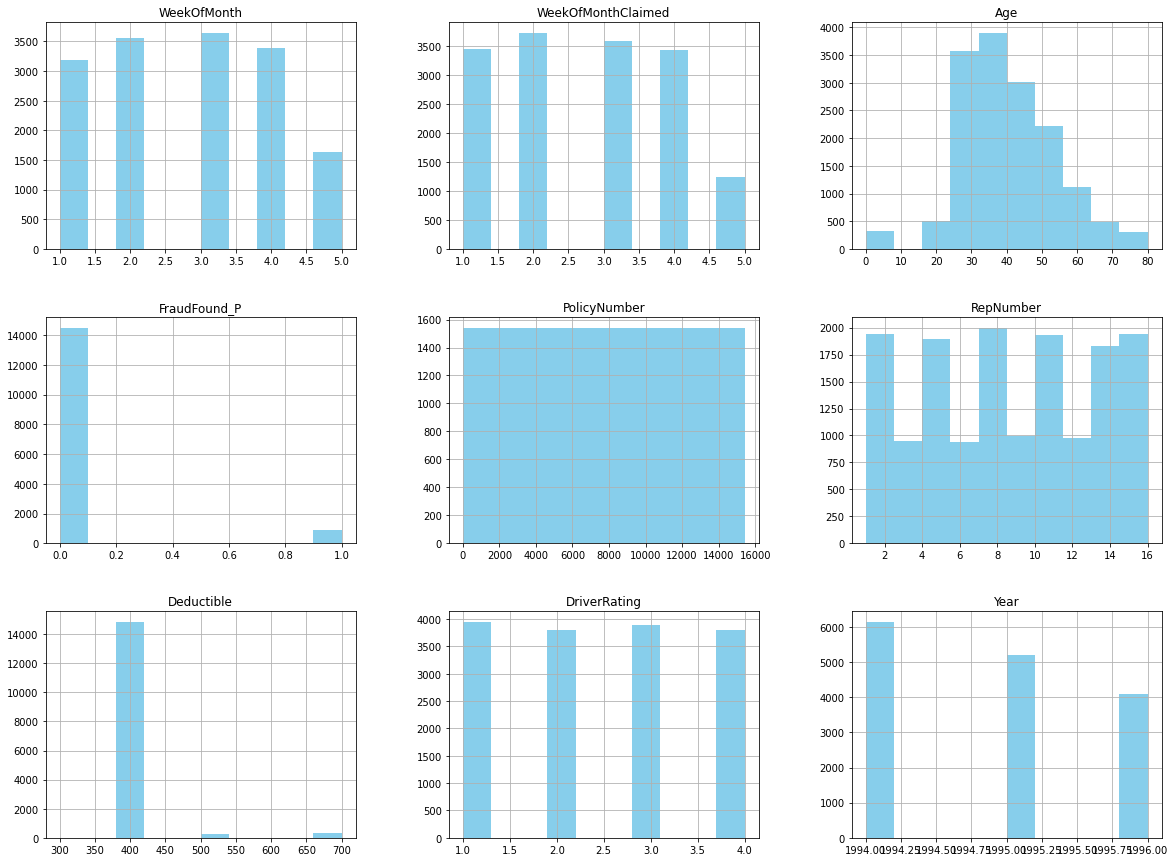

In [ ]:
df.hist(figsize=(20,15),color='skyblue')

The most age is between 30-40 years old. The most Fraud_Found_P is 0. The most deductible is between 400. There were no significant difference between driver rating.  

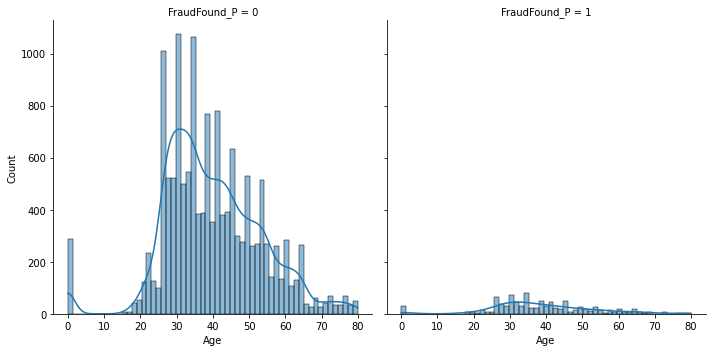

In [ ]:
sns.displot(data=df, x="Age", col='FraudFound_P', kde=True)
plt.show()

**Pair Plot**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


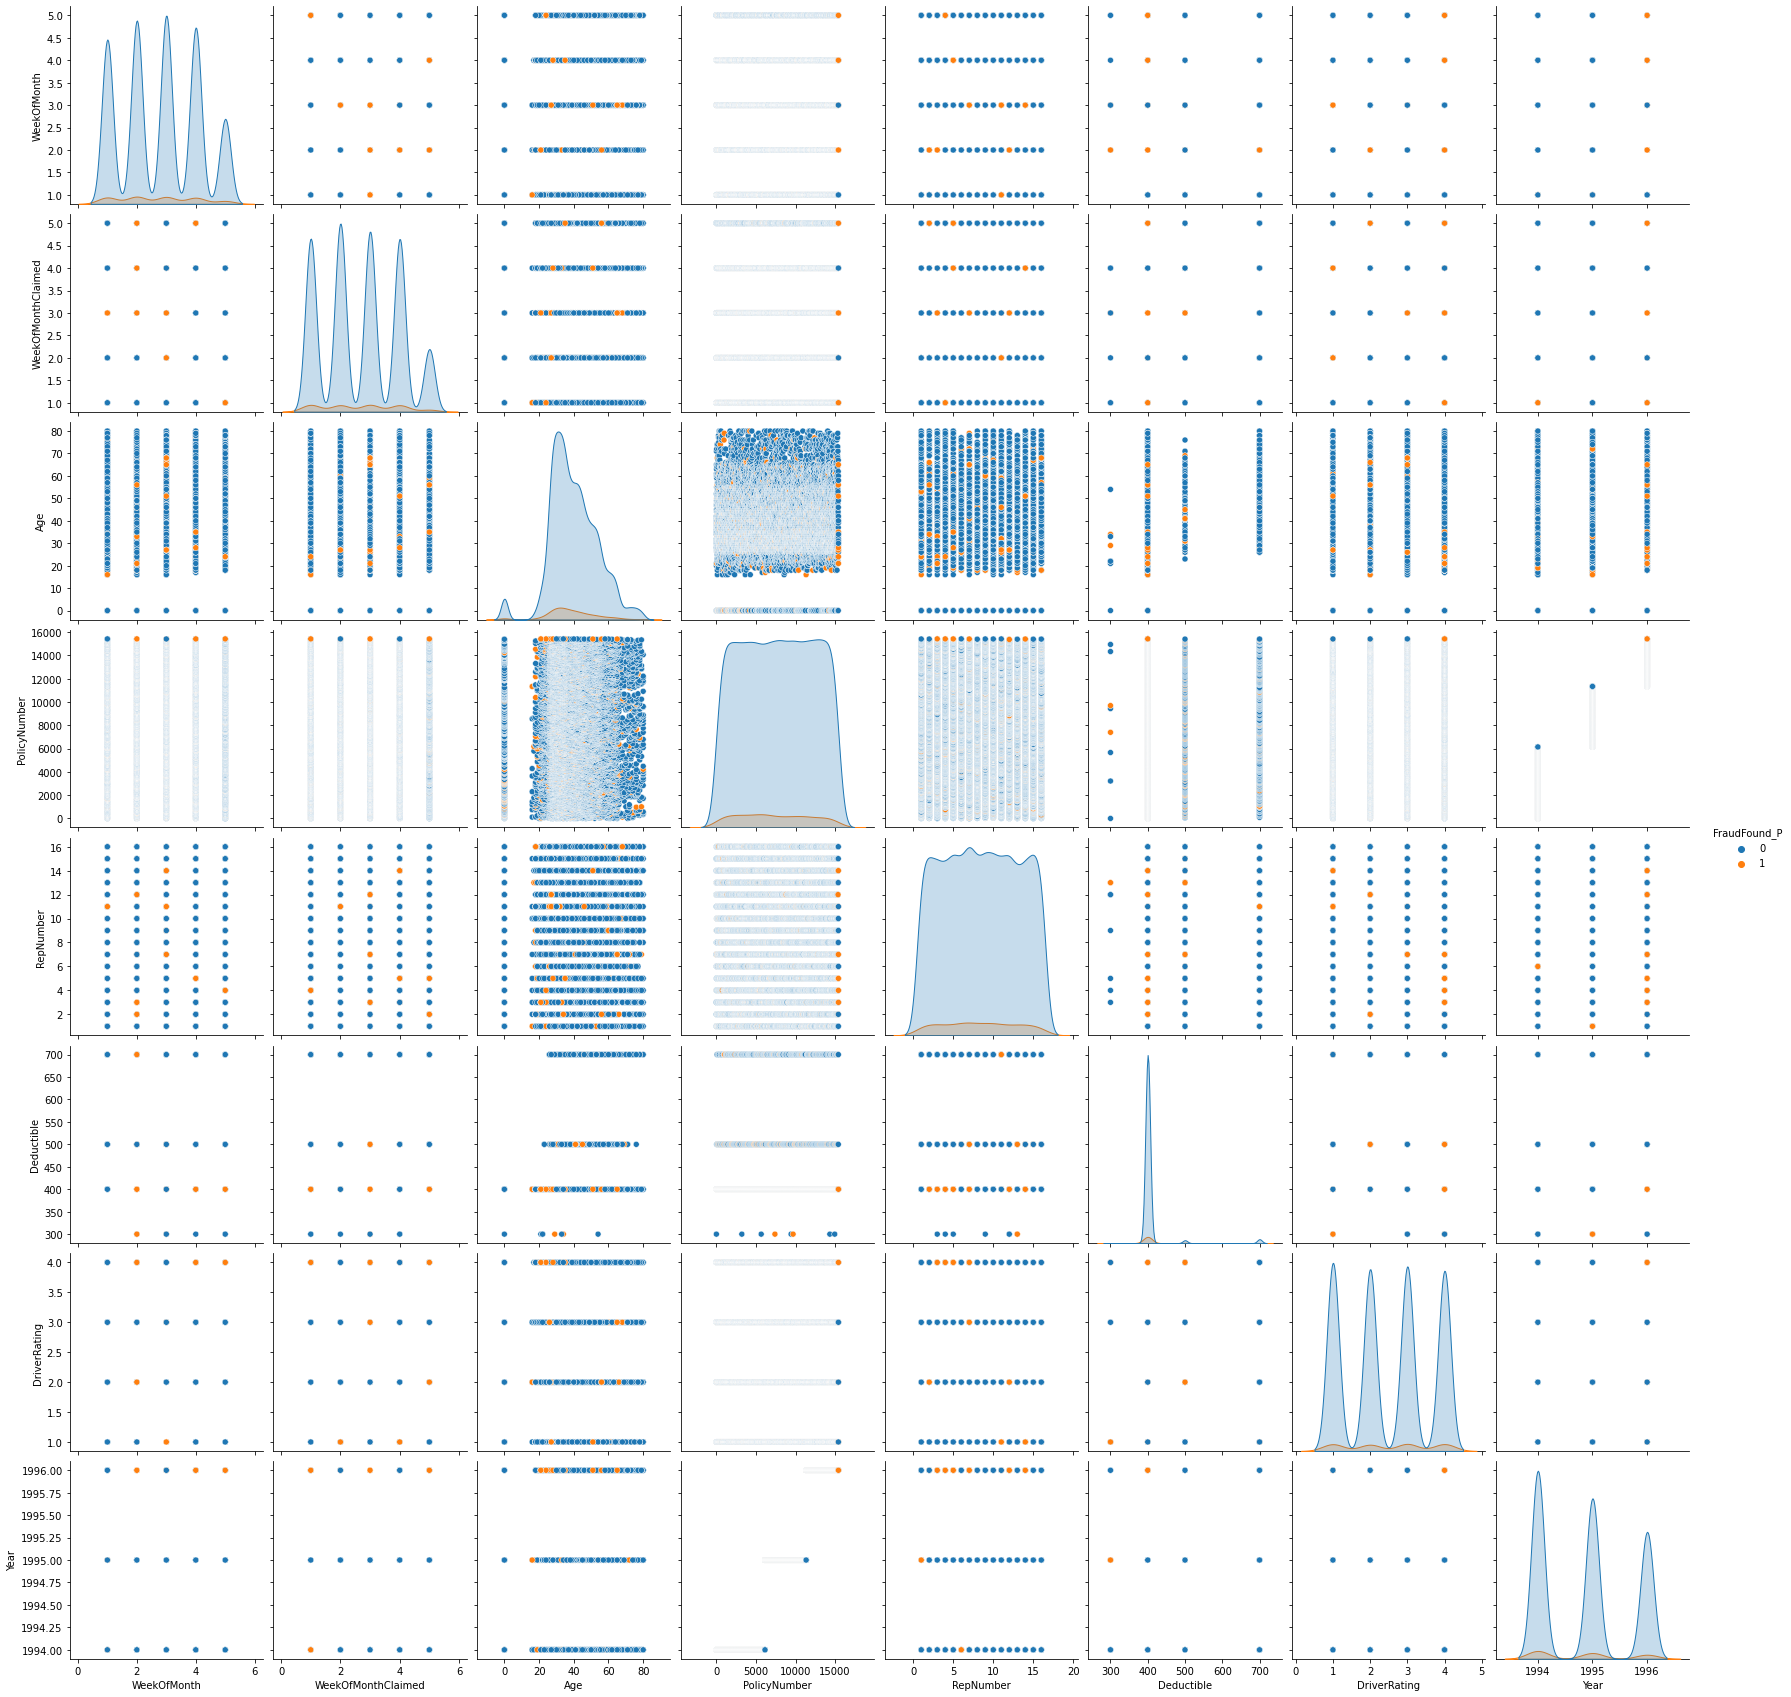

In [ ]:
sns.pairplot(data=df,hue="FraudFound_P",size=3);
plt.show()

####**Correlation Matrix**####

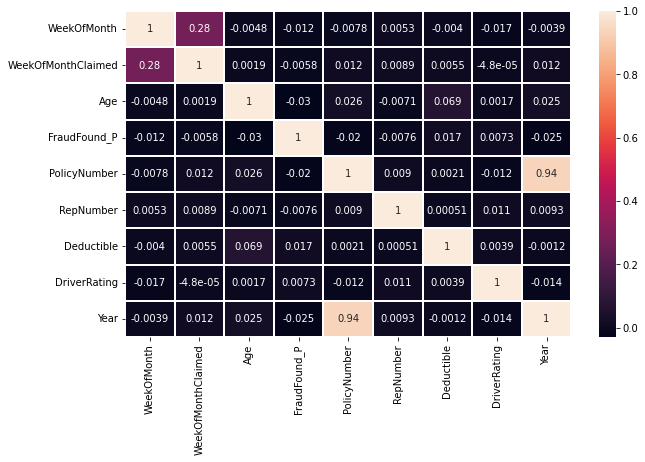

In [ ]:
# heatmap

plt.figure(figsize = (10, 6))

corr = df.corr()

sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [ ]:
df.corr()['FraudFound_P'].sort_values(ascending=False)

FraudFound_P          1.000000
Deductible            0.017348
DriverRating          0.007266
WeekOfMonthClaimed   -0.005761
RepNumber            -0.007551
WeekOfMonth          -0.011861
PolicyNumber         -0.020345
Year                 -0.024760
Age                  -0.029741
Name: FraudFound_P, dtype: float64

####**Checking for Multicolinearity**####

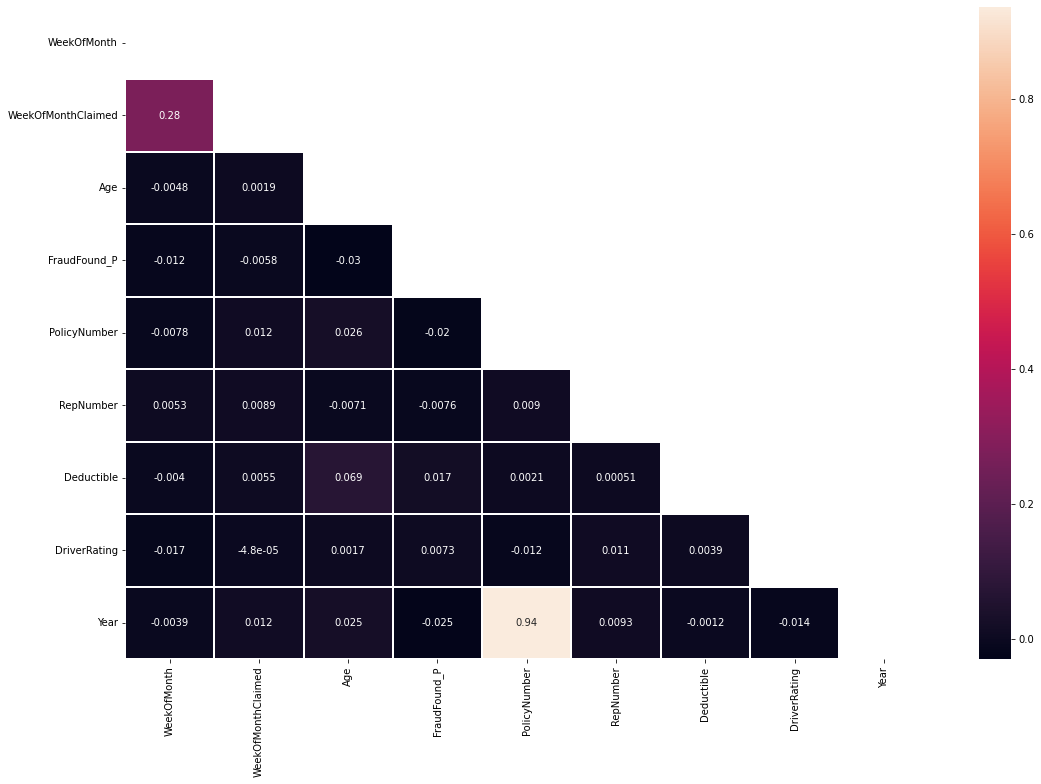

In [ ]:
# checking for multicollinearity

plt.figure(figsize = (18, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

From the above plot, we can see that there is no high correlation between colums

####**Checking Number of Unique Values**####

In [ ]:
df.nunique()

Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            8
MonthClaimed               13
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
FraudFound_P                2
PolicyNumber            15420
RepNumber                  16
Deductible                  4
DriverRating                4
Days_Policy_Accident        5
Days_Policy_Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange_Claim         5
NumberOfCars                5
Year                        3
BasePolicy                  3
dtype: int

In [ ]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


####**Remove Unnecessary Columns**####

In [ ]:
# dropping columns which are not necessary for prediction

to_drop = ['Month','WeekOfMonth','DayOfWeek','Make','AccidentArea','DayOfWeekClaimed',
           'MonthClaimed','WeekOfMonthClaimed','PolicyNumber','RepNumber','Year']

df.drop(to_drop, inplace = True, axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Sex                   15420 non-null  object
 1   MaritalStatus         15420 non-null  object
 2   Age                   15420 non-null  int64 
 3   Fault                 15420 non-null  object
 4   PolicyType            15420 non-null  object
 5   VehicleCategory       15420 non-null  object
 6   VehiclePrice          15420 non-null  object
 7   FraudFound_P          15420 non-null  int64 
 8   Deductible            15420 non-null  int64 
 9   DriverRating          15420 non-null  int64 
 10  Days_Policy_Accident  15420 non-null  object
 11  Days_Policy_Claim     15420 non-null  object
 12  PastNumberOfClaims    15420 non-null  object
 13  AgeOfVehicle          15420 non-null  object
 14  AgeOfPolicyHolder     15420 non-null  object
 15  PoliceReportFiled     15420 non-null

###**Data Preprocessing**##

####**Separating the feature and target columns**####




In [ ]:
X = df.drop('FraudFound_P', axis = 1)
y = df['FraudFound_P']

###**Encoding Categorical Columns**###

*Seeing* the percentage distribution of categorical data, if there is one value that dominates the feature, it will be discarded

In [ ]:
for col in df.select_dtypes(include='object').columns.tolist():
    print(df[col].value_counts(normalize=True)*100)
    print('\n')

Male      84.306096
Female    15.693904
Name: Sex, dtype: float64


Married     68.904021
Single      30.376135
Divorced     0.492866
Widow        0.226978
Name: MaritalStatus, dtype: float64


Policy Holder    72.827497
Third Party      27.172503
Name: Fault, dtype: float64


Sedan - Collision       36.212711
Sedan - Liability       32.341115
Sedan - All Perils      26.504540
Sport - Collision        2.256809
Utility - All Perils     2.204929
Utility - Collision      0.194553
Sport - All Perils       0.142672
Utility - Liability      0.136187
Sport - Liability        0.006485
Name: PolicyType, dtype: float64


Sedan      62.717250
Sport      34.747082
Utility     2.535668
Name: VehicleCategory, dtype: float64


20000 to 29000     52.392996
30000 to 39000     22.911803
more than 69000    14.033722
less than 20000     7.107652
40000 to 59000      2.989624
60000 to 69000      0.564202
Name: VehiclePrice, dtype: float64


more than 30    98.878080
none             0.356680
8 to 15        

####**Extracting Categorical Columns**####

In [ ]:
# extracting categorical columns
cat_df = X.select_dtypes(include = ['object'])

In [ ]:
cat_df.head()

,Sex,MaritalStatus,Fault,PolicyType,VehicleCategory,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
0,Female,Single,Policy Holder,Sport - Liability,Sport,more than 69000,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,Liability
1,Male,Single,Policy Holder,Sport - Collision,Sport,more than 69000,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,Collision
2,Male,Married,Policy Holder,Sport - Collision,Sport,more than 69000,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,Collision
3,Male,Married,Third Party,Sedan - Liability,Sport,20000 to 29000,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,Liability
4,Female,Single,Third Party,Sport - Collision,Sport,more than 69000,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision


####**Printing Unique Values of Each Columns**####

In [ ]:
# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

Sex: 
['Female' 'Male']

MaritalStatus: 
['Single' 'Married' 'Widow' 'Divorced']

Fault: 
['Policy Holder' 'Third Party']

PolicyType: 
['Sport - Liability' 'Sport - Collision' 'Sedan - Liability'
 'Utility - All Perils' 'Sedan - All Perils' 'Sedan - Collision'
 'Utility - Collision' 'Utility - Liability' 'Sport - All Perils']

VehicleCategory: 
['Sport' 'Utility' 'Sedan']

VehiclePrice: 
['more than 69000' '20000 to 29000' '30000 to 39000' 'less than 20000'
 '40000 to 59000' '60000 to 69000']

Days_Policy_Accident: 
['more than 30' '15 to 30' 'none' '1 to 7' '8 to 15']

Days_Policy_Claim: 
['more than 30' '15 to 30' '8 to 15' 'none']

PastNumberOfClaims: 
['none' '1' '2 to 4' 'more than 4']

AgeOfVehicle: 
['3 years' '6 years' '7 years' 'more than 7' '5 years' 'new' '4 years'
 '2 years']

AgeOfPolicyHolder: 
['26 to 30' '31 to 35' '41 to 50' '51 to 65' '21 to 25' '36 to 40'
 '16 to 17' 'over 65' '18 to 20']

PoliceReportFiled: 
['No' 'Yes']

WitnessPresent: 
['No' 'Yes']

AgentType: 


####**Get Dummies from Categorical Columns**####

In [ ]:
cat_df = pd.get_dummies(cat_df, drop_first = True)

In [ ]:
cat_df.head()

,Sex_Male,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,Fault_Third Party,PolicyType_Sedan - Collision,PolicyType_Sedan - Liability,PolicyType_Sport - All Perils,PolicyType_Sport - Collision,PolicyType_Sport - Liability,...,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_Collision,BasePolicy_Liability
0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
1,1,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,1,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,1,1,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


####**Extracting the Numerical Columns**####

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Sex                   15420 non-null  object
 1   MaritalStatus         15420 non-null  object
 2   Age                   15420 non-null  int64 
 3   Fault                 15420 non-null  object
 4   PolicyType            15420 non-null  object
 5   VehicleCategory       15420 non-null  object
 6   VehiclePrice          15420 non-null  object
 7   Deductible            15420 non-null  int64 
 8   DriverRating          15420 non-null  int64 
 9   Days_Policy_Accident  15420 non-null  object
 10  Days_Policy_Claim     15420 non-null  object
 11  PastNumberOfClaims    15420 non-null  object
 12  AgeOfVehicle          15420 non-null  object
 13  AgeOfPolicyHolder     15420 non-null  object
 14  PoliceReportFiled     15420 non-null  object
 15  WitnessPresent        15420 non-null

In [ ]:
# extracting the numerical columns

num_df = X.select_dtypes(include = ['int64','float64'])

In [ ]:
num_df.head()

,Age,Deductible,DriverRating
0,21,300,1
1,34,400,4
2,47,400,3
3,65,400,2
4,27,400,1


####**Combining Numerical and Categorical Columns**####

In [ ]:
# combining the Numerical and Categorical dataframes to get the final dataset

X = pd.concat([num_df, cat_df], axis = 1)

In [ ]:
X.head()

,Age,Deductible,DriverRating,Sex_Male,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,Fault_Third Party,PolicyType_Sedan - Collision,PolicyType_Sedan - Liability,...,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_Collision,BasePolicy_Liability
0,21,300,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,34,400,4,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,47,400,3,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,65,400,2,1,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
4,27,400,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


####**Normalization**####

In [ ]:
num_df = X[['Age', 'Deductible', 'DriverRating']]

In [ ]:
# Scaling the numeric values in the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)

In [ ]:
scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df.columns, index = X.index)
scaled_num_df.head()

,Age,Deductible,DriverRating
0,-1.397554,-2.450633,-1.329092
1,-0.434015,-0.175298,1.350875
2,0.529523,-0.175298,0.457553
3,1.863653,-0.175298,-0.435770
4,-0.952844,-0.175298,-1.329092


In [ ]:
X.drop(columns = scaled_num_df.columns, inplace = True)

In [ ]:
X = pd.concat([scaled_num_df, X], axis = 1)

In [ ]:
X.head()

,Age,Deductible,DriverRating,Sex_Male,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,Fault_Third Party,PolicyType_Sedan - Collision,PolicyType_Sedan - Liability,...,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_Collision,BasePolicy_Liability
0,-1.397554,-2.450633,-1.329092,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,-0.434015,-0.175298,1.350875,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0.529523,-0.175298,0.457553,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1.863653,-0.175298,-0.435770,1,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
4,-0.952844,-0.175298,-1.329092,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

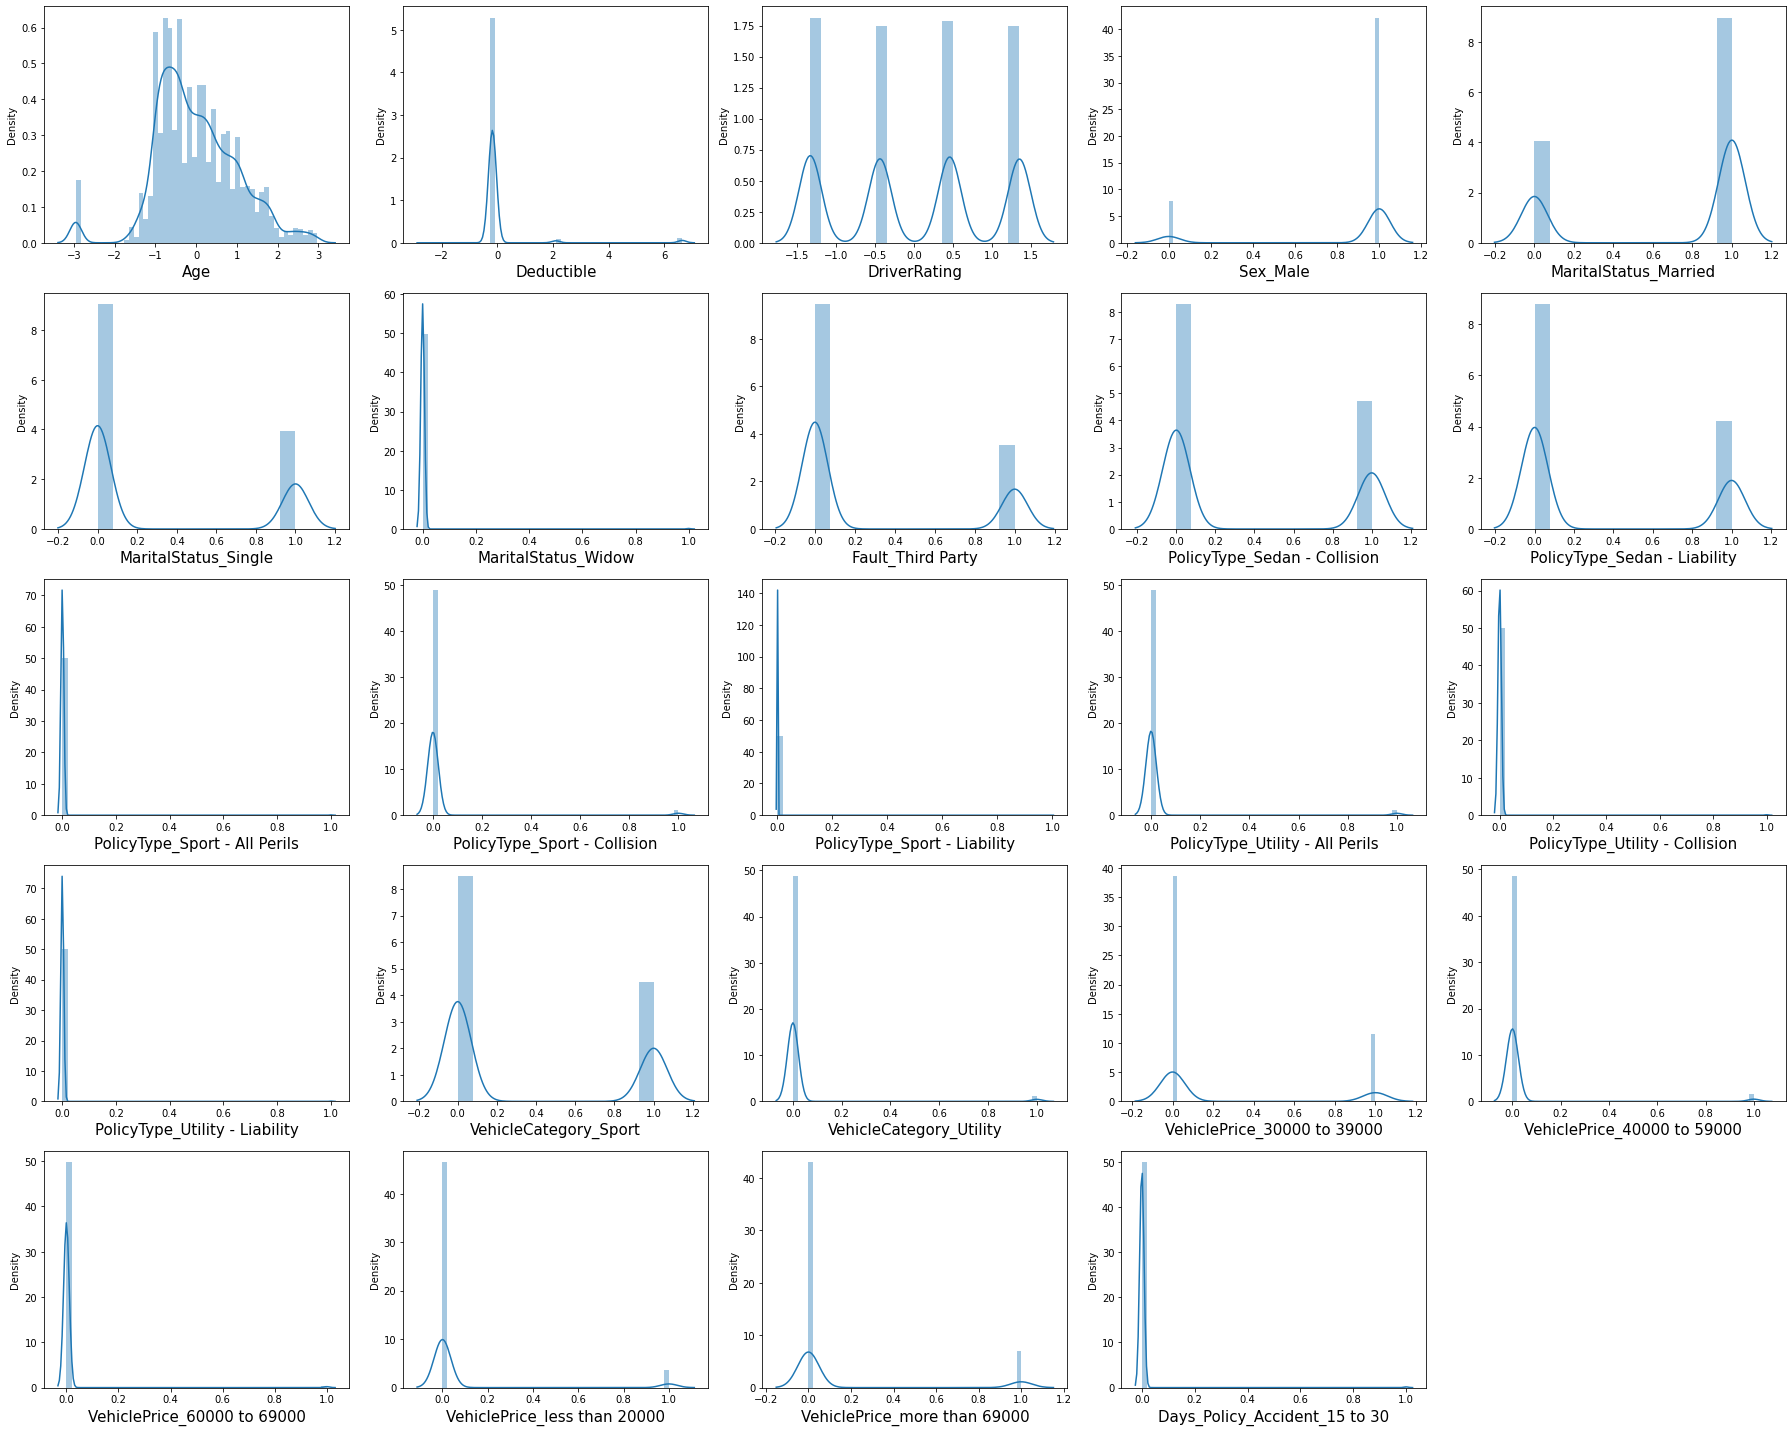

In [ ]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

Data looks good, let's check for outliers.




###**Outliers Detection**###

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

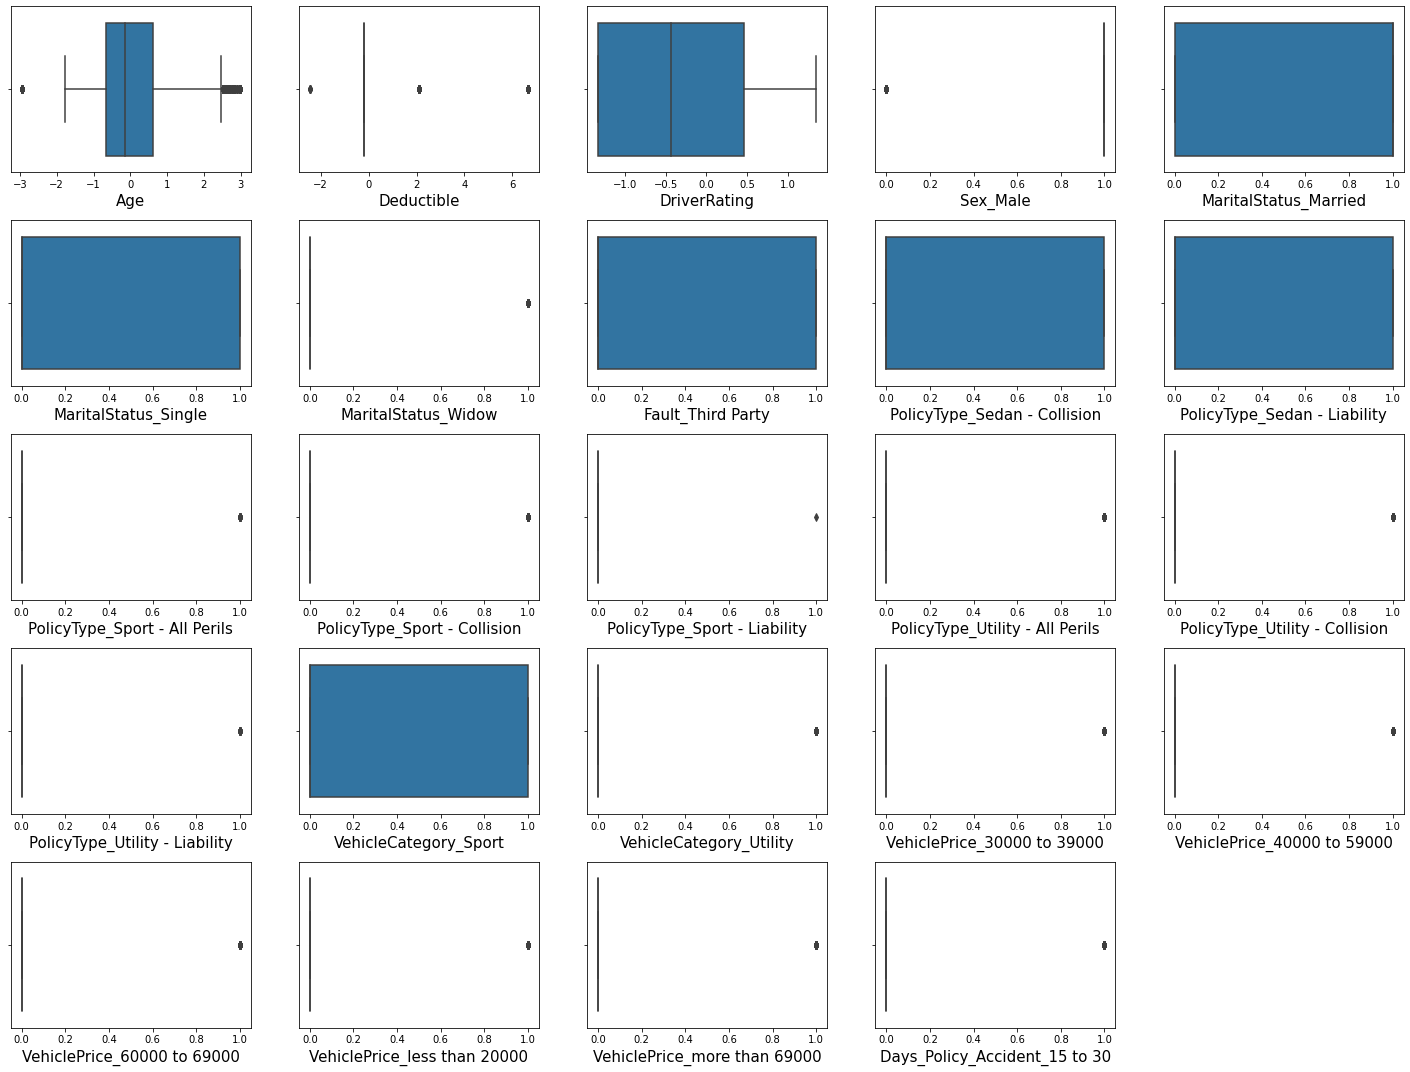

In [ ]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

Outliers are present in some numerical columns we will scale numerical columns later



####**Balancing the Dataset using oversampling (SMOTE)**####

In [ ]:
from imblearn.over_sampling import SMOTE 

OS_SMOTE = SMOTE()

X, y = OS_SMOTE.fit_resample(X,y)

   Labels  FraudFound_P
0       0         14497
1       1         14497


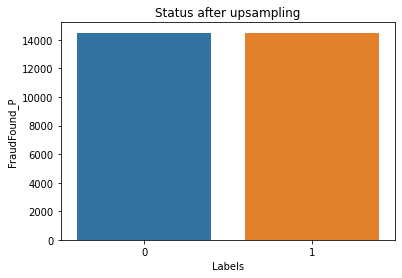

In [ ]:
oversample_plot = y.value_counts().reset_index()
oversample_plot.columns = ['Labels','FraudFound_P']
print(oversample_plot)
sns.barplot(x='Labels',y='FraudFound_P',data=oversample_plot);
plt.title('Status after upsampling');

####**Reduce Overfitting using Principal Component Analysis (PCA)**####

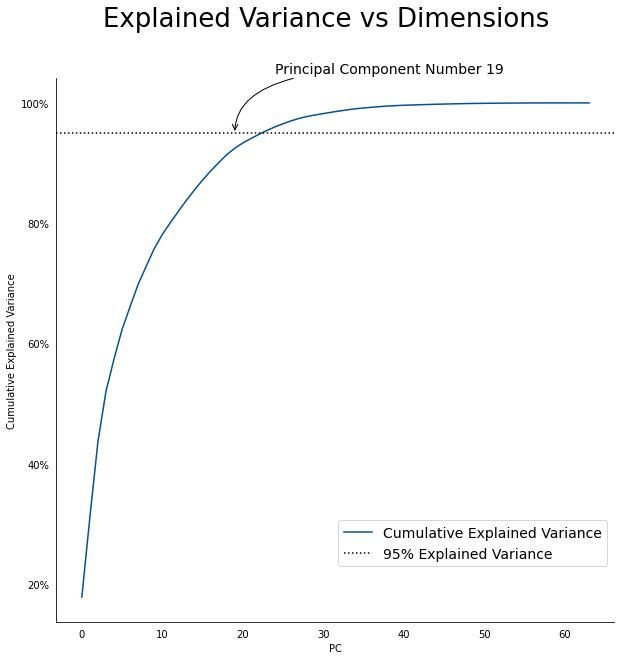

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.ticker as mtick
import matplotlib as mpl

pca = PCA()
pca.fit(X)

cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]

# Visualize
fig, ax = plt.subplots(figsize =(10, 10))
fig.patch.set_facecolor('white')
mpl.rcParams['font.family'] = 'Ubuntu'
mpl.rcParams['font.size'] = 14

ax.plot(d,cumsum, color = '#00538F', label='Cumulative Explained Variance')

ax.axhline(y = 95, color='black', linestyle=':', label = '95% Explained Variance')
ax.legend(loc='best')

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top','right']:
    ax.spines[i].set_visible(False)

# Set percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# annotation arrow
arrowprops = dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90")
plt.annotate('Principal Component Number 19', 
             xy=(19, 95), 
             xytext=(19+5, 95+10), 
             arrowprops=arrowprops,
             size = 14)

plt.legend(bbox_to_anchor = (1, 0.2))

plt.suptitle('Explained Variance vs Dimensions', size=26)
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('PC');

###**Split Dataset**###

In [ ]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
X_train

,Age,Deductible,DriverRating,Sex_Male,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,Fault_Third Party,PolicyType_Sedan - Collision,PolicyType_Sedan - Liability,...,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_Collision,BasePolicy_Liability
9974,0.381286,-0.175298,0.457553,1,0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
2818,0.158931,-0.175298,-1.329092,1,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
27655,-0.803806,-0.175298,0.008479,1,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
1547,-1.175199,-0.175298,-0.435770,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
18999,-0.667121,-0.175298,-0.776735,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,0.677760,-0.175298,-0.435770,1,1,0,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0
7034,0.455405,-0.175298,-1.329092,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
19585,0.173641,2.100037,-0.435770,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9722,-1.026962,-0.175298,0.457553,1,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
y_train

9974     0
2818     0
27655    1
1547     0
18999    1
        ..
901      0
7034     0
19585    1
9722     0
2769     0
Name: FraudFound_P, Length: 23195, dtype: int64

In [ ]:
X_test

,Age,Deductible,DriverRating,Sex_Male,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,Fault_Third Party,PolicyType_Sedan - Collision,PolicyType_Sedan - Liability,...,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_Collision,BasePolicy_Liability
20808,-0.834033,-0.175298,0.457553,1,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
14093,-0.656370,-0.175298,-1.329092,1,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4594,-0.211660,-0.175298,1.350875,1,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
23650,-0.601651,-0.175298,1.350875,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
27187,-0.434015,-0.175298,-1.283074,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28665,-0.574306,-0.175298,-0.339998,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
19155,-0.602335,-0.175298,1.188058,1,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
26545,1.367299,-0.175298,0.457553,1,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
12237,0.307168,-0.175298,-1.329092,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
y_test

20808    1
14093    0
4594     0
23650    1
27187    1
        ..
28665    1
19155    1
26545    1
12237    0
5867     0
Name: FraudFound_P, Length: 5799, dtype: int64

###**Modeling**###

####**Models**####
1. Support Vector Classifier
2. KNN
3. Decision Tree Classifier
4. Random Forest Classifier
5. Ada Boost Classifier
6. Gradient Boosting Classifier
7. Stochastic Gradient Boosting (SGB)
8. XgBoost
9. Cat Boost Classifier
10. Extra Trees Classifier
11. LGBM Classifier
12. Voting Classifier

####**1. Support Vector Classifier**####

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

In [ ]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Support Vector Classifier is : {svc_train_acc}")
print(f"Test accuracy of Support Vector Classifier is : {svc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Support Vector Classifier is : 0.891097219228282
Test accuracy of Support Vector Classifier is : 0.8798068632522849
[[2363  531]
 [ 166 2739]]
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      2894
           1       0.84      0.94      0.89      2905

    accuracy                           0.88      5799
   macro avg       0.89      0.88      0.88      5799
weighted avg       0.89      0.88      0.88      5799



####**2. KNN**####

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [ ]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of KNN is : {knn_train_acc}")
print(f"Test accuracy of KNN is : {knn_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of KNN is : 0.8262987712869153
Test accuracy of KNN is : 0.8106570098292809
[[1875 1019]
 [  79 2826]]
              precision    recall  f1-score   support

           0       0.96      0.65      0.77      2894
           1       0.73      0.97      0.84      2905

    accuracy                           0.81      5799
   macro avg       0.85      0.81      0.81      5799
weighted avg       0.85      0.81      0.81      5799



####**3. Decision Tree Classifier**####

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

In [ ]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 0.9967234317740893
Test accuracy of Decision Tree is : 0.9101569236075185
[[2591  303]
 [ 218 2687]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2894
           1       0.90      0.92      0.91      2905

    accuracy                           0.91      5799
   macro avg       0.91      0.91      0.91      5799
weighted avg       0.91      0.91      0.91      5799



In [ ]:
# hyper parameter tuning

from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [ ]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 8}
0.838887691312783


In [ ]:
# best estimator 

dtc = grid_search.best_estimator_

y_pred = dtc.predict(X_test)

In [ ]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Training accuracy of Decision Tree is : 0.8473809010562621
Test accuracy of Decision Tree is : 0.826694257630626
[[2009  885]
 [ 120 2785]]
              precision    recall  f1-score   support

           0       0.94      0.69      0.80      2894
           1       0.76      0.96      0.85      2905

    accuracy                           0.83      5799
   macro avg       0.85      0.83      0.82      5799
weighted avg       0.85      0.83      0.82      5799



####**4. Random Forest Classifier**####

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion= 'entropy', 
                                  max_depth= 10, 
                                  max_features= 'sqrt', 
                                  min_samples_leaf= 1, 
                                  min_samples_split= 3, 
                                  n_estimators= 140)
rand_clf.fit(X_train, y_train)

y_pred = rand_clf.predict(X_test)

In [ ]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Random Forest is : 0.8496658762664367
Test accuracy of Random Forest is : 0.8358337644421452
[[2032  862]
 [  90 2815]]
              precision    recall  f1-score   support

           0       0.96      0.70      0.81      2894
           1       0.77      0.97      0.86      2905

    accuracy                           0.84      5799
   macro avg       0.86      0.84      0.83      5799
weighted avg       0.86      0.84      0.83      5799



####**5. Ada Boost Classifier**####

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 5, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                                                min_samples_leaf=2,
                                                                                min_samples_split=8)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [ ]:
# best parameter and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 180}
0.9586548825177841


In [ ]:
# best estimator 

ada = grid_search.best_estimator_

y_pred = ada.predict(X_test)

In [ ]:
# accuracy_score, confusion_matrix and classification_report

ada_train_acc = accuracy_score(y_train, ada.predict(X_train))
ada_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Ada Boost is : {ada_train_acc}")
print(f"Test accuracy of Ada Boost is : {ada_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Ada Boost is : 0.9967234317740893
Test accuracy of Ada Boost is : 0.9589584411105363
[[2794  100]
 [ 138 2767]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2894
           1       0.97      0.95      0.96      2905

    accuracy                           0.96      5799
   macro avg       0.96      0.96      0.96      5799
weighted avg       0.96      0.96      0.96      5799



##**6. Gradient Boosting Classifier**##

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")

Training Accuracy of Gradient Boosting Classifier is 0.8754472946755766
Test Accuracy of Gradient Boosting Classifier is 0.8665287118468702 

Confusion Matrix :- 
[[2263  631]
 [ 143 2762]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      0.78      0.85      2894
           1       0.81      0.95      0.88      2905

    accuracy                           0.87      5799
   macro avg       0.88      0.87      0.87      5799
weighted avg       0.88      0.87      0.87      5799



##**7. Stochastic Gradient Boosting (SGB)**##

In [ ]:
sgb = GradientBoostingClassifier(subsample = 0.90, max_features = 0.70)
sgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier

sgb_acc = accuracy_score(y_test, sgb.predict(X_test))

print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(y_train, sgb.predict(X_train))}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, sgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, sgb.predict(X_test))}")

Training Accuracy of Stochastic Gradient Boosting is 0.871825824531149
Test Accuracy of Stochastic Gradient Boosting is 0.8637696154509398 

Confusion Matrix :- 
[[2245  649]
 [ 141 2764]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      0.78      0.85      2894
           1       0.81      0.95      0.87      2905

    accuracy                           0.86      5799
   macro avg       0.88      0.86      0.86      5799
weighted avg       0.88      0.86      0.86      5799



##**8. XGBoost Classifier**##

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

In [ ]:
# accuracy_score, confusion_matrix and classification_report

xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of XgBoost is : {xgb_train_acc}")
print(f"Test accuracy of XgBoost is : {xgb_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of XgBoost is : 0.8713515843931882
Test accuracy of XgBoost is : 0.8601483014312813
[[2230  664]
 [ 147 2758]]
              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2894
           1       0.81      0.95      0.87      2905

    accuracy                           0.86      5799
   macro avg       0.87      0.86      0.86      5799
weighted avg       0.87      0.86      0.86      5799



In [ ]:
param_grid = {"n_estimators": [10, 50, 100, 130], "criterion": ['gini', 'entropy'],
                               "max_depth": range(2, 10, 1)}

grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5,  verbose=3,n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                                                min_samples_leaf=2,
                                                                                min_samples_split=8)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [ ]:
# accuracy_score, confusion_matrix and classification_report

xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of XgBoost is : {xgb_train_acc}")
print(f"Test accuracy of XgBoost is : {xgb_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of XgBoost is : 0.8713515843931882
Test accuracy of XgBoost is : 0.8601483014312813
[[2230  664]
 [ 147 2758]]
              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2894
           1       0.81      0.95      0.87      2905

    accuracy                           0.86      5799
   macro avg       0.87      0.86      0.86      5799
weighted avg       0.87      0.86      0.86      5799



##**9. Cat Boost Classifier**##

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.2 MB/s 


In [ ]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(iterations=10)
cat.fit(X_train, y_train)

Learning rate set to 0.5
0:	learn: 0.4832024	total: 55.6ms	remaining: 501ms
1:	learn: 0.4471381	total: 64.2ms	remaining: 257ms
2:	learn: 0.4225918	total: 72.2ms	remaining: 168ms
3:	learn: 0.4049573	total: 80ms	remaining: 120ms
4:	learn: 0.3510720	total: 87.9ms	remaining: 87.9ms
5:	learn: 0.3388218	total: 96ms	remaining: 64ms
6:	learn: 0.3125817	total: 104ms	remaining: 44.6ms
7:	learn: 0.3057953	total: 111ms	remaining: 27.9ms
8:	learn: 0.2954309	total: 120ms	remaining: 13.3ms
9:	learn: 0.2840704	total: 128ms	remaining: 0us


In [ ]:
# accuracy score, confusion matrix and classification report of cat boost

cat_acc = accuracy_score(y_test, cat.predict(X_test))

print(f"Training Accuracy of Cat Boost Classifier is {accuracy_score(y_train, cat.predict(X_train))}")
print(f"Test Accuracy of Cat Boost Classifier is {cat_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, cat.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, cat.predict(X_test))}")

Training Accuracy of Cat Boost Classifier is 0.8748868290579866
Test Accuracy of Cat Boost Classifier is 0.8682531470943267 

Confusion Matrix :- 
[[2363  531]
 [ 233 2672]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.91      0.82      0.86      2894
           1       0.83      0.92      0.87      2905

    accuracy                           0.87      5799
   macro avg       0.87      0.87      0.87      5799
weighted avg       0.87      0.87      0.87      5799



##**10. Extra Tress Classifier**##

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of extra trees classifier

etc_acc = accuracy_score(y_test, etc.predict(X_test))

print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(y_train, etc.predict(X_train))}")
print(f"Test Accuracy of Extra Trees Classifier is {etc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, etc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, etc.predict(X_test))}")

Training Accuracy of Extra Trees Classifier is 0.9967234317740893
Test Accuracy of Extra Trees Classifier is 0.9336092429729264 

Confusion Matrix :- 
[[2658  236]
 [ 149 2756]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      0.92      0.93      2894
           1       0.92      0.95      0.93      2905

    accuracy                           0.93      5799
   macro avg       0.93      0.93      0.93      5799
weighted avg       0.93      0.93      0.93      5799



##**11. LGBM Classifier**##

In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of lgbm classifier

lgbm_acc = accuracy_score(y_test, lgbm.predict(X_test))

print(f"Training Accuracy of LGBM Classifier is {accuracy_score(y_train, lgbm.predict(X_train))}")
print(f"Test Accuracy of LGBM Classifier is {lgbm_acc} \n")

print(f"{confusion_matrix(y_test, lgbm.predict(X_test))}\n")
print(classification_report(y_test, lgbm.predict(X_test)))

Training Accuracy of LGBM Classifier is 0.8530286699719767
Test Accuracy of LGBM Classifier is 0.8360062079668908 

[[2267  627]
 [ 324 2581]]

              precision    recall  f1-score   support

           0       0.87      0.78      0.83      2894
           1       0.80      0.89      0.84      2905

    accuracy                           0.84      5799
   macro avg       0.84      0.84      0.84      5799
weighted avg       0.84      0.84      0.84      5799



##**12. Voting Classifier**##

In [ ]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Support Vector Classifier', svc), ('KNN', knn),  ('Decision Tree', dtc), ('Random Forest', rand_clf),
               ('Ada Boost', ada), ('XGboost', xgb), ('Gradient Boosting Classifier', gb), ('SGB', sgb),
               ('Cat Boost', cat), ('Extra Trees Classifier', etc), ('LGBM', lgbm)]

vc = VotingClassifier(estimators = classifiers)
vc.fit(X_train, y_train)

y_pred = vc.predict(X_test)

Learning rate set to 0.5
0:	learn: 0.4832024	total: 8.03ms	remaining: 72.3ms
1:	learn: 0.4471381	total: 16.3ms	remaining: 65ms
2:	learn: 0.4225918	total: 24.2ms	remaining: 56.4ms
3:	learn: 0.4049573	total: 33.1ms	remaining: 49.6ms
4:	learn: 0.3510720	total: 41.1ms	remaining: 41.1ms
5:	learn: 0.3388218	total: 49ms	remaining: 32.6ms
6:	learn: 0.3125817	total: 56.8ms	remaining: 24.4ms
7:	learn: 0.3057953	total: 64.3ms	remaining: 16.1ms
8:	learn: 0.2954309	total: 72.3ms	remaining: 8.04ms
9:	learn: 0.2840704	total: 80.4ms	remaining: 0us


In [ ]:
# accuracy_score, confusion_matrix and classification_report

vc_train_acc = accuracy_score(y_train, vc.predict(X_train))
vc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Voting Classifier is : {vc_train_acc}")
print(f"Test accuracy of Voting Classifier is : {vc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Voting Classifier is : 0.8957102823884457
Test accuracy of Voting Classifier is : 0.881703742024487
[[2298  596]
 [  90 2815]]
              precision    recall  f1-score   support

           0       0.96      0.79      0.87      2894
           1       0.83      0.97      0.89      2905

    accuracy                           0.88      5799
   macro avg       0.89      0.88      0.88      5799
weighted avg       0.89      0.88      0.88      5799



##**Models Performance Comparison**##

In [ ]:
models = pd.DataFrame({
    'Model' : ['SVC', 'KNN', 'Decision Tree', 'Random Forest','Ada Boost', 'Gradient Boost', 'SGB', 'Cat Boost', 'Extra Trees', 'LGBM', 'XgBoost', 'Voting Classifier'],
    'Score' : [svc_test_acc, knn_test_acc, dtc_test_acc, rand_clf_test_acc, ada_test_acc, gb_acc, sgb_acc, cat_acc, etc_acc, lgbm_acc, xgb_test_acc, vc_test_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,Ada Boost,0.958958
8,Extra Trees,0.933609
11,Voting Classifier,0.881704
0,SVC,0.879807
7,Cat Boost,0.868253
5,Gradient Boost,0.866529
6,SGB,0.863770
10,XgBoost,0.860148
9,LGBM,0.836006
3,Random Forest,0.835834


In [ ]:
import plotly.express as px

px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', 
       title = 'Models Comparison')

###**Conclusion**###

Best Model : Ada Boost Classifier
Accuracy : 0.958958 (95,90 %)
